In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import binned_statistic
import math

In [2]:
cvfolds = 5
pred_y = np.load("lstmpred.npy")
seqlen = pred_y.shape[1]
pred_y = pred_y.reshape((-1, 2))
print pred_y.shape, seqlen

(5400L, 2L) 100


In [3]:
y = np.loadtxt("London_data_2x1000Center_bin100_pos.dat") / 3.5
print y.shape

(5400L, 2L)


In [4]:
def mse(y, t, axis=2):
    return (np.square(y - t).mean(axis=axis).mean())

def mean_distance(y, t, axis=2):
    return np.mean(np.sqrt(np.sum((y - t)**2, axis=axis)))

In [5]:
print mse(pred_y[:1100], y[:1100], axis=1), mean_distance(pred_y[:1100], y[:1100], axis=1)
print mse(pred_y[4400:], y[4400:], axis=1), mean_distance(pred_y[4400:], y[4400:], axis=1)

105.933380622 12.4324665941
82.1831913863 10.803131842


In [6]:
errors = np.sqrt(np.sum((pred_y - y)**2, axis=1))
print np.mean(errors), errors.shape

10.9135301773 (5400L,)


In [7]:
meanerrors = np.mean(np.reshape(errors, (cvfolds, -1)), axis=1)
print meanerrors, meanerrors.shape

[ 12.36982601  10.51970009  11.21554479   9.76230358  10.70027642] (5L,)


In [8]:
plotmeanerrors = np.repeat(meanerrors, errors.shape[0] / cvfolds)
print plotmeanerrors.shape, plotmeanerrors[:20]

(5400L,) [ 12.36982601  12.36982601  12.36982601  12.36982601  12.36982601
  12.36982601  12.36982601  12.36982601  12.36982601  12.36982601
  12.36982601  12.36982601  12.36982601  12.36982601  12.36982601
  12.36982601  12.36982601  12.36982601  12.36982601  12.36982601]


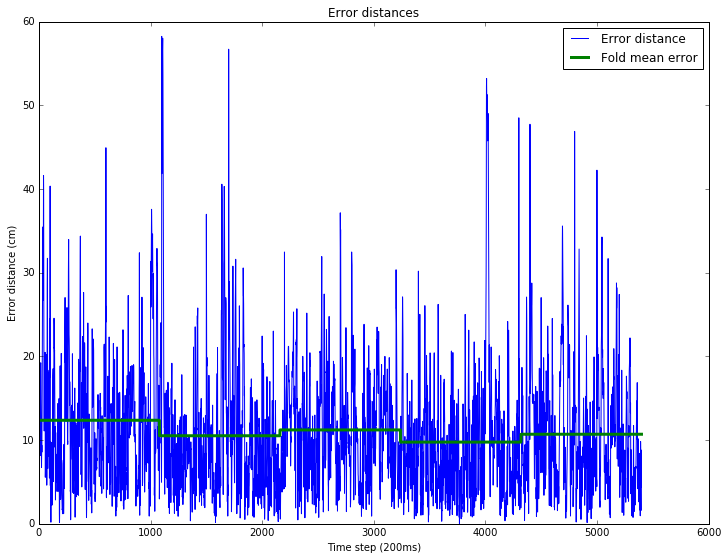

In [9]:
plt.figure(figsize=(12,9))
plt.plot(errors)
plt.plot(plotmeanerrors, linewidth=3);
plt.legend(("Error distance", "Fold mean error"))
plt.title("Error distances")
plt.ylabel("Error distance (cm)")
plt.xlabel("Time step (200ms)")

(54L, 100L)
(100L,)


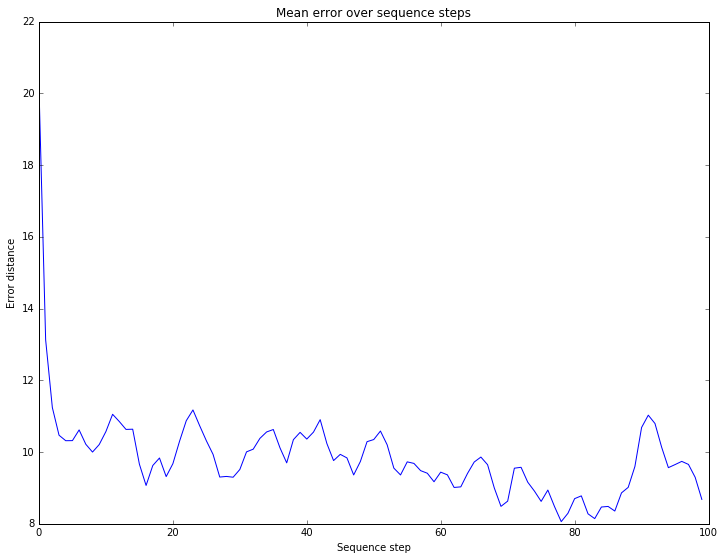

In [12]:
seqerrors = np.reshape(errors, (-1,100))
print seqerrors.shape
meanerrors = np.mean(seqerrors, axis=0)
print meanerrors.shape
plt.figure(figsize=(12,9))
plt.plot(meanerrors);
plt.title("Mean error over sequence steps")
plt.ylabel("Error distance")
plt.xlabel("Sequence step")

In [13]:
pred_y2 = np.load("lstm_cv9.npy").reshape((-1, 2))
print pred_y2.shape
errors2 = np.sqrt(np.sum((pred_y2 - y)**2, axis=1))
print errors2.shape

(5400L, 2L)
(5400L,)


(54L, 100L)
(100L,)


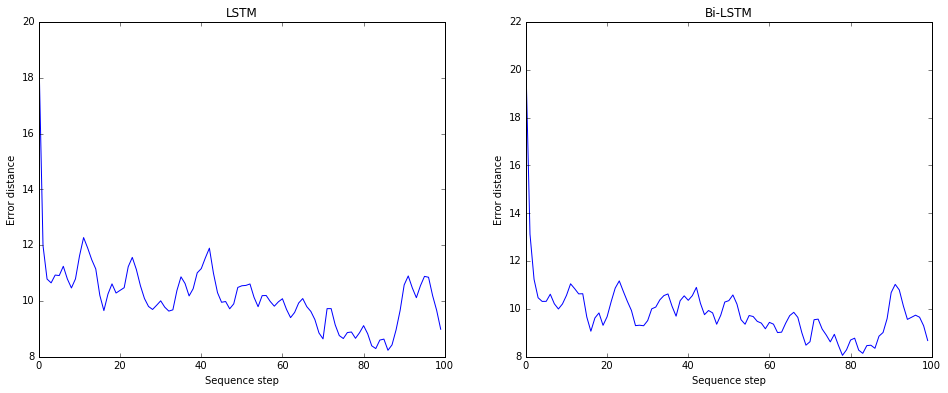

In [14]:
seqerrors2 = np.reshape(errors2, (-1,100))
print seqerrors2.shape
meanerrors2 = np.mean(seqerrors2, axis=0)
print meanerrors2.shape
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(meanerrors2);
plt.title("LSTM")
plt.ylabel("Error distance")
plt.xlabel("Sequence step")
plt.subplot(1,2,2)
plt.plot(meanerrors);
plt.title("Bi-LSTM")
plt.ylabel("Error distance")
plt.xlabel("Sequence step")

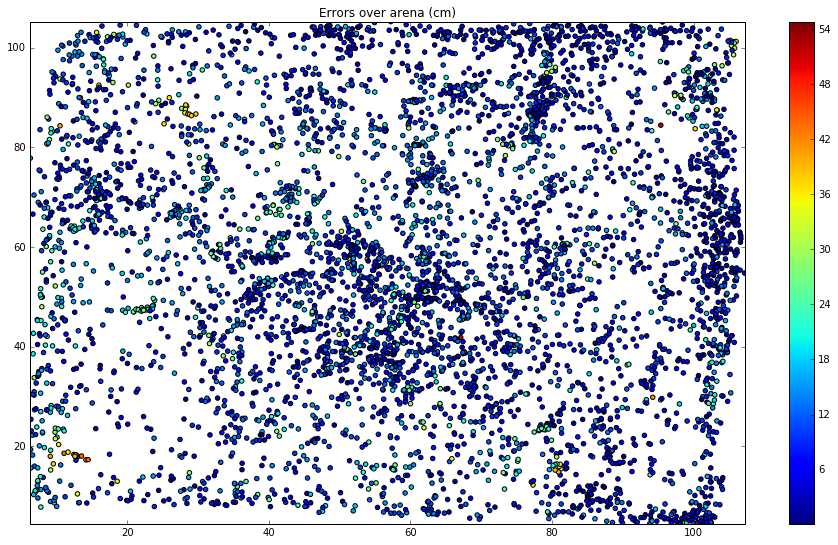

In [15]:
plt.figure(figsize=(16,9))
plt.scatter(y[:,0], y[:,1],c=errors)
plt.xlim([np.min(y[:,0]), np.max(y[:,0])])
plt.ylim([np.min(y[:,1]), np.max(y[:,1])])
plt.colorbar();
plt.title("Errors over arena (cm)")

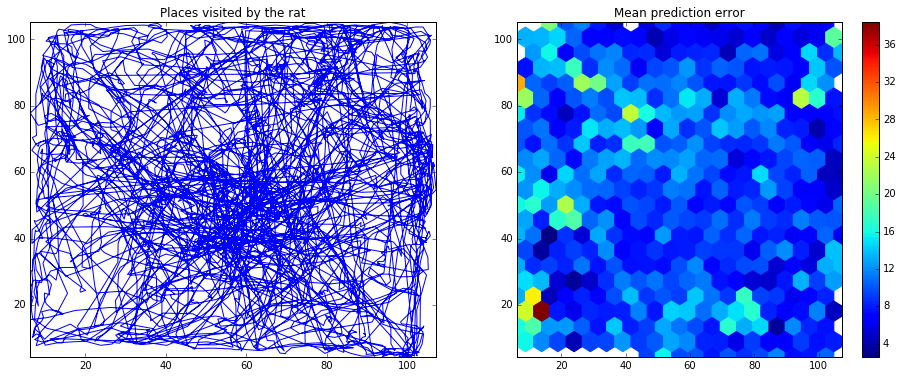

In [16]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(y[:,0], y[:,1]);
plt.title("Places visited by the rat")
plt.xlim([np.min(y[:,0]), np.max(y[:,0])])
plt.ylim([np.min(y[:,1]), np.max(y[:,1])])
plt.subplot(1,2,2)
plt.title("Mean prediction error")
plt.hexbin(y[:,0], y[:,1],C=errors, gridsize=20)
plt.colorbar();

In [17]:
seqy = np.reshape(y, (-1, 100, 2))
print seqy.shape
diff = seqy[:,1:,:] - seqy[:,:-1,:]
print diff.shape
diff  = np.reshape(diff, (-1, 2))
print diff.shape

differrors = np.reshape(seqerrors[:,1:], (-1))
print differrors.shape

(54L, 100L, 2L)
(54L, 99L, 2L)
(5346L, 2L)
(5346L,)


In [18]:
dists = np.sqrt(np.sum(diff**2, axis=1))
print dists.shape, np.mean(dists)

(5346L,) 3.75025333672


101 100


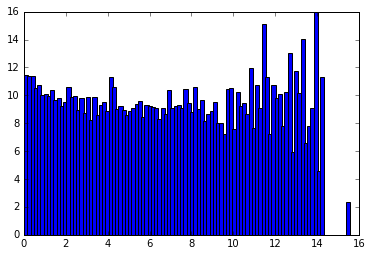

In [19]:
nb_bins = 100
bins = binned_statistic(dists, differrors, statistic='mean', bins=nb_bins)
print len(bins.bin_edges), len(bins.statistic)
plt.bar(bins.bin_edges[:-1], bins.statistic,width=0.2);

In [20]:
angles = np.arctan2(diff[:,1], diff[:,0])
print angles.shape

(5346L,)


In [21]:
nb_bins = 100
bins = binned_statistic(angles, differrors, statistic='mean', bins=nb_bins)
print len(bins.bin_edges), len(bins.statistic)

101 100


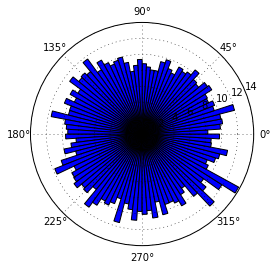

In [22]:
plt.gca(projection='polar')
plt.bar(bins.bin_edges[:-1], bins.statistic, width=2*math.pi/nb_bins);

(4.4611428571428577, 105.23828571428571)

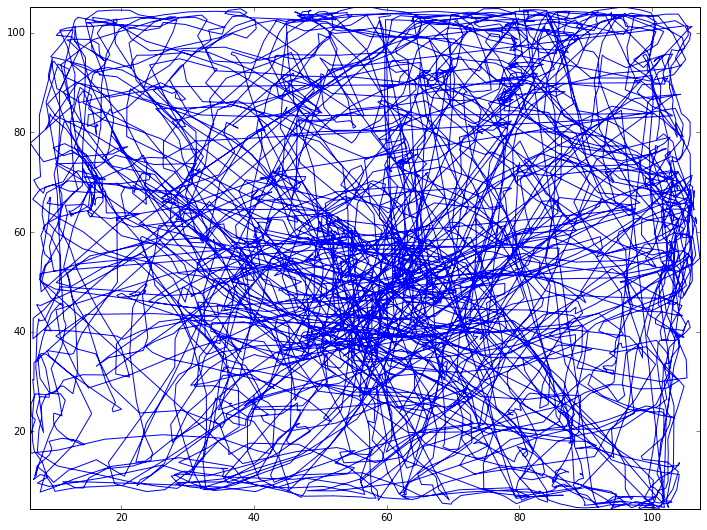

In [23]:
y = np.loadtxt("London_RNN_data_2x1000_at50_bin100-RAW_pos.dat") / 3.5
plt.figure(figsize=(12,9))
plt.plot(y[:,0], y[:,1]);
plt.xlim([np.min(y[:,0]), np.max(y[:,0])])
plt.ylim([np.min(y[:,1]), np.max(y[:,1])])

(1.2745714285714287, 30.068000000000001)

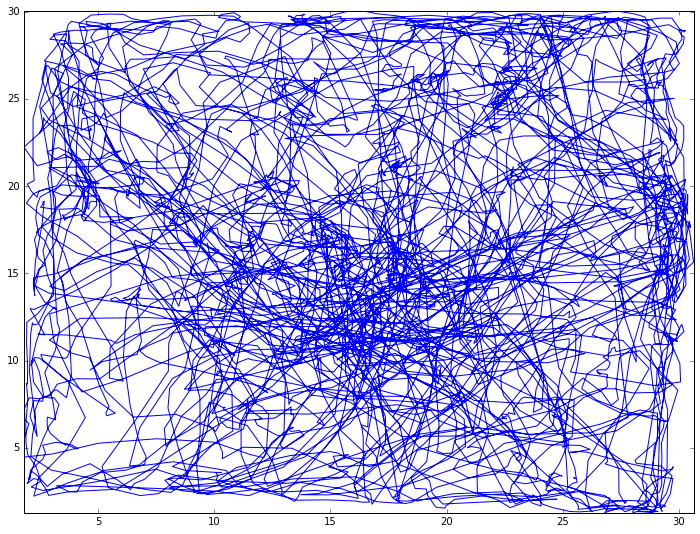

In [10]:
y = np.loadtxt("London_RNN_data_2x1000_at50_bin100-RAW_pos.dat") / 3.5
plt.figure(figsize=(12,9))
plt.plot(y[:,0], y[:,1]);
plt.xlim([np.min(y[:,0]), np.max(y[:,0])])
plt.ylim([np.min(y[:,1]), np.max(y[:,1])])